# Business Objective:

* Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

# Data Set Details: 
Each row corresponds to a client of a telecommunications company for whom it has collected information about the type of plan they have contracted, the minutes they have talked, or the charge they pay every month.

The data set includes the following variables: 

* state: Categorical, for the 51 states and the District of Columbia.
* 	Area.code
*	account.length: how long the account has been active.
*	voice.plan: yes or no, voicemail plan.
*	voice.messages: number of voicemail messages.
*	intl.plan: yes or no, international plan.
*	intl.mins: minutes customer used service to make international calls.
*	intl.calls: total number of international calls.
*	intl.charge: total international charge.
*	day.mins: minutes customer used service during the day.
*	day.calls: total number of calls during the day.
*	day.charge: total charge during the day.
*	eve.mins: minutes customer used service during the evening.
*	eve.calls: total number of calls during the evening.
*	eve.charge: total charge during the evening.
*	night.mins: minutes customer used service during the night.
*	night.calls: total number of calls during the night.
*	night.charge: total charge during the night.
*	customer.calls: number of calls to customer service.
*	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


# 1. Installing Necessary Libraries

In [17]:
pip install us

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
pip install association_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Importing Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import association_metrics as am
import us

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing , linear_model
from sklearn.linear_model import LinearRegression
import sklearn.feature_selection
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, accuracy_score

# 3. Importing the Data

In [22]:
df=pd.read_csv("/content/Churn.csv")
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


# 4. Information about the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [24]:
df.shape

(5000, 21)

In [25]:
df.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.50,3750.25,5000.00
account.length,5000.0,100.258600,39.694560,1.0,73.00,100.00,127.00,243.00
voice.messages,5000.0,7.755200,13.546393,0.0,0.00,0.00,17.00,52.00
intl.mins,5000.0,10.261780,2.761396,0.0,8.50,10.30,12.00,20.00
intl.calls,5000.0,4.435200,2.456788,0.0,3.00,4.00,6.00,20.00
intl.charge,5000.0,2.771196,0.745514,0.0,2.30,2.78,3.24,5.40
day.mins,5000.0,180.288900,53.894699,0.0,143.70,180.10,216.20,351.50
day.calls,5000.0,100.029400,19.831197,0.0,87.00,100.00,113.00,165.00
eve.calls,5000.0,100.191000,19.826496,0.0,87.00,100.00,114.00,170.00
eve.charge,5000.0,17.054322,4.296843,0.0,14.14,17.09,19.90,30.91


In [27]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())
    print("==============================================================")

Unnamed: 0 
 1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: Unnamed: 0, Length: 5000, dtype: int64
state 
 WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64
area.code 
 area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64
account.length 
 90     65
87     59
105    57
93     57
112    56
       ..
215     1
238     1
216     1
208     1
233     1
Name: account.length, Length: 218, dtype: int64
voice

In [28]:
for i in df.columns:
  print(i , "\n" , df[i].unique())

Unnamed: 0 
 [   1    2    3 ... 4998 4999 5000]
state 
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
area.code 
 ['area_code_415' 'area_code_408' 'area_code_510']
account.length 
 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21

In [29]:
for feature in df:
    print(f'> {feature} has {len(df[feature].unique())} unique values')

> Unnamed: 0 has 5000 unique values
> state has 51 unique values
> area.code has 3 unique values
> account.length has 218 unique values
> voice.plan has 2 unique values
> voice.messages has 48 unique values
> intl.plan has 2 unique values
> intl.mins has 170 unique values
> intl.calls has 21 unique values
> intl.charge has 170 unique values
> day.mins has 1961 unique values
> day.calls has 123 unique values
> day.charge has 1962 unique values
> eve.mins has 1877 unique values
> eve.calls has 126 unique values
> eve.charge has 1659 unique values
> night.mins has 1853 unique values
> night.calls has 131 unique values
> night.charge has 1028 unique values
> customer.calls has 10 unique values
> churn has 2 unique values


In [30]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 7 categorical variables

The categorical variables are :
 ['state', 'area.code', 'voice.plan', 'intl.plan', 'day.charge', 'eve.mins', 'churn']


There are 14 Numeric variables

The Numeric variables are :
 ['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


# 5. Data Pre-Processing

## 5.1 Removing Irrelevant column

In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## 5.2 Renaming Columns

In [32]:
# standardizing column names by removing space
df.columns = df.columns.str.replace('.','_')

In [33]:
df.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

## 5.3 Duplicates

In [34]:
# to see duplicate values in the dataset

#Count of duplicated rows
df[df.duplicated()].shape

(0, 20)

## 5.4 Null Values

In [35]:
for i in df.columns:
    print(i,"  :    ",df[i].isin(['Nan','NAN','NaN','nan']).any())

state   :     False
area_code   :     False
account_length   :     False
voice_plan   :     False
voice_messages   :     False
intl_plan   :     False
intl_mins   :     False
intl_calls   :     False
intl_charge   :     False
day_mins   :     False
day_calls   :     False
day_charge   :     True
eve_mins   :     True
eve_calls   :     False
eve_charge   :     False
night_mins   :     False
night_calls   :     False
night_charge   :     False
customer_calls   :     False
churn   :     False


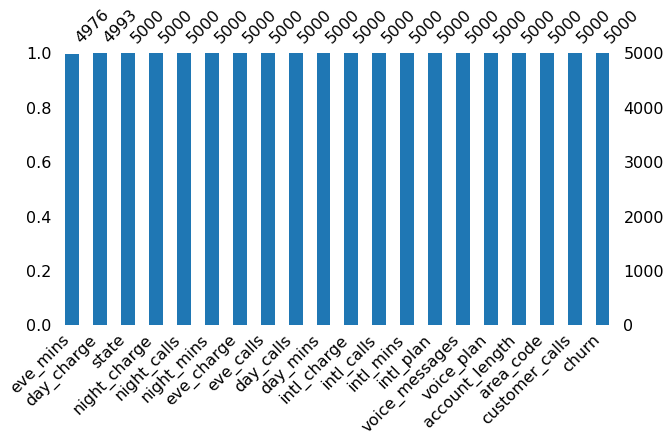

In [36]:
# visualizing null values
df1 = df.copy()
df1['eve_mins'] = df1['eve_mins'].replace('Nan',np.nan)
df1['day_charge'] = df1['day_charge'].replace('Nan',np.nan)
msno.bar(df1, color="tab:blue", sort="ascending", figsize=(10,5))

In [37]:
plt.figure(figsize=(20,7))
fig = px.imshow(df.corr().round(3), text_auto=True, aspect="auto", color_continuous_scale='PuBu', title="Correlation Matrix")
fig.update_xaxes(tickangle=90)
fig.update_layout(title_x=0.5)
fig.show()

<Figure size 1440x504 with 0 Axes>

In [38]:
# creating function for null value imputation

def nullvalueimputer(data,x,y):
    data[y].replace(['Nan','NAN','NaN','nan'],np.nan,inplace=True)
    #separating testing data
    test_data = data[data[y].isin([np.nan])]
    x_test = pd.DataFrame([test_data[x]]).T
    y_test = pd.DataFrame([test_data[y]]).T

    #separating training data
    train_data = data.dropna(axis = 0)
    y_train = pd.DataFrame(train_data[y])
    x_train = pd.DataFrame(train_data[x])

    #creating regression model
    reg = LinearRegression()
    reg.fit(x_train,y_train)

    #making predictions
    y_pred = reg.predict(x_test)

    #imputing predicted values
    test_data.loc[test_data[y].isnull(), y] = y_pred

    #concating and creating a fresh dataframe
    new_df = pd.concat([test_data, train_data])
    new_df = new_df.sort_index(axis = 0)
    return new_df

In [39]:
#null value imputation for day_charge
new = nullvalueimputer(data=df,x="day_mins",y="day_charge")

In [40]:
#null value imputation for eve_mins
df = nullvalueimputer(new,"eve_charge","eve_mins")

In [41]:
for i in df.columns:
    print(i,"  :    ",df[i].isin(['Nan','NAN','NaN','nan']).any())

state   :     False
area_code   :     False
account_length   :     False
voice_plan   :     False
voice_messages   :     False
intl_plan   :     False
intl_mins   :     False
intl_calls   :     False
intl_charge   :     False
day_mins   :     False
day_calls   :     False
day_charge   :     False
eve_mins   :     False
eve_calls   :     False
eve_charge   :     False
night_mins   :     False
night_calls   :     False
night_charge   :     False
customer_calls   :     False
churn   :     False


In [42]:
#changing the data types of both the columns
df['day_charge']=pd.to_numeric(df['day_charge'],errors='coerce')
df['eve_mins']=pd.to_numeric(df['eve_mins'],errors='coerce')

## 5.5 Changing state codes to state names

In [43]:
## Converting State codes to State name


states = us.states.mapping("abbr","name")
State = df['state'].map(lambda x: states.get(x, x))

df.insert(loc=0, column='State_names', value=State)
df.rename(columns = {'state':'State_codes'}, inplace = True)

In [44]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 6 categorical variables

The categorical variables are :
 ['State_names', 'State_codes', 'area_code', 'voice_plan', 'intl_plan', 'churn']


There are 15 Numeric variables

The Numeric variables are :
 ['account_length', 'voice_messages', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 'customer_calls']


# 6. Visualisation

## 6.1 Univariate

### 6.1.1 Univariate - Numerical

In [45]:
col_names = ["account_length", "voice_messages", "intl_mins", "intl_calls", "intl_charge",             
             "day_mins", "day_calls", "day_charge", "eve_mins", "eve_calls",            
             "eve_charge", "night_mins", "night_calls", "night_charge", "customer_calls"]

colors = ['Red', 'Blue', 'Green', 'Indigo', 'Pink', 'Purple', 'Brown', 'Gray', 'Black', 'darkcyan', 'Magenta',
          'salmon', 'Gold', 'deeppink',"Goldenrod"]

fig = make_subplots(rows=3, cols=5, specs=[[{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}]])

row = 1
col = 1
for count, col_name in enumerate(col_names):
    fig.add_trace(go.Box(y=df[col_name], marker=dict(color=colors[count]),name=col_name), row=row, col=col)
    col += 1
    if col > 5:
        row += 1
        col = 1
fig.update_layout(title='Box Plots of all Numerical Variables',
                  title_font=dict(size=30))
fig.update_layout(
    title={ 'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)       
fig.show()

In [46]:
fig = make_subplots(rows=3, cols=5, specs=[[{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"}],
                                           [{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"}],
                                           [{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"},{"type": "Histogram"}]],
                    subplot_titles=col_names)

row = 1
col = 1
for count, col_name in enumerate(col_names):    
    fig.add_trace(go.Histogram(x=df[col_name], marker=dict(color=colors[count]), name=col_name), row=row, col=col)
    col += 1
    if col > 5:
        row += 1
        col = 1

fig.update_layout(
    title='Histogram of all Numerical Variables',
    title_font=dict(size=30),
    title_x=0.5,
    title_y=0.95,
    height=800,
    font=dict(size=10),
    xaxis=dict(tickangle=-45),
    margin=dict(autoexpand=True, l=100, r=100, t=100, b=100),
    legend=dict(font=dict(size=14))
)

fig.show()

Conclusion :

---

•	From the graphs, we came to know that apart from international calls, voice messages, and customer_calls, all the variables have nearly normal distribution. Right skewness can be witnessed in voice_messages and international calls and customer calls.

•	Outliers can be witnessed in the plots of almost all the variables.




### 6.1.2 Univariate - Categorical

In [47]:
cat_cols = ['area_code', 'voice_plan', 'intl_plan', 'churn', 'State_names']
for i in cat_cols:
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]],subplot_titles=["Bar Chart","Pie Chart"], column_widths=[0.6, 0.4])
    fig.add_trace(go.Bar(x=df[i].value_counts().index,y=df[i].value_counts()),row=1, col=1)
    fig.add_trace(go.Pie(labels=df[i].value_counts().index,values=df[i].value_counts()),row=1, col=2)
    fig.update_layout({'title':{'text':f"plots for {i}",'x':0.5,'y':0.9,'font_size':25,'font_color':'Blue'}}
                    ,showlegend=False)
    fig.update_xaxes(tickangle=-45)
    fig.show()

In [48]:
fig = make_subplots(rows=2, cols=4,vertical_spacing = 0.12               
                    ,specs=[[{"rowspan": 2 , "colspan": 2, "type": "choropleth"},None, {"type": "pie"} , {"type": "pie"}],
                            [   None          , None  ,    {"type": "pie"} , {"type": "pie"} ]]
                   ,subplot_titles=('State','','','',''))

state_counts = df['State_codes'].value_counts().reset_index()
state_counts.columns = ['State_codes', 'count']
fig_t1 = px.choropleth(state_counts, locations='State_codes', locationmode="USA-states", hover_name="State_codes",
                      color='count', color_continuous_scale="Viridis", title='State')
fig_t1.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=4000, 
                  height=1500)
fig.add_trace(fig_t1['data'][0], row=1, col=1)


values = df['area_code'].value_counts().tolist()
labels = df['area_code'].value_counts().index.tolist()
fig.add_trace(go.Pie(labels=labels, values=values, name='area_code', hole=0.7, marker=dict(colors=['#f5a623','#3690c0'], line=dict(color='#000000', width=2)),title='Area Code' ,textinfo="label+percent", textposition='outside'), row=1, col=3)

values = df['voice_plan'].value_counts().tolist()
labels = df['voice_plan'].value_counts().index.tolist()
fig.add_trace(go.Pie(labels=labels, values=values, name='voice__plan', hole=0.7, marker=dict(colors=['#f5a623','#3690c0'], line=dict(color='#000000', width=2)) ,title='Voice Plan',textinfo="label+percent", textposition='outside'), row=1, col=4)

values = df['intl_plan'].value_counts().tolist()
labels = df['intl_plan'].value_counts().index.tolist()
fig.add_trace(go.Pie(labels=labels, values=values, name='intl_plan', hole=0.7, marker=dict(colors=['#f5a623','#3690c0'], line=dict(color='#000000', width=2)),title='International Plan' ,textinfo="label+percent", textposition='outside'), row=2, col=3)

values = df['churn'].value_counts().tolist()
labels = df['churn'].value_counts().index.tolist()
fig.add_trace(go.Pie(labels=labels, values=values, name='churn', hole=0.7, marker=dict(colors=['#f5a623','#3690c0'], line=dict(color='#000000', width=2)) ,title='Churn',textinfo="label+percent", textposition='outside'), row=2, col=4)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(showlegend=False)
fig.update_layout(height=500)
fig.show()

Conclusion:

---

•	The maximum frequency can be witnessed from West Virginia

•	The most frequency are from the Area code 415 followed by 408 and 510

•	The maximum frequency are of the customers who do not have a voicemail plan

•	The maximum frequency are of the customers who do not have the International plan


## 6.2 Bivariate

### 6.2.1 Bivariate - Numerical

In [49]:

fig = make_subplots(rows=3, cols=5, vertical_spacing = 0.25,specs=[[{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}]])
yes = df[df["churn"]=="yes"]
no = df[df["churn"]=="no"]
row = 1
col = 1
for i, col_name in enumerate(numeric):
    if i == 0:
        fig.add_trace(go.Histogram(x=yes[col_name], marker=dict(color='Red'), name = "Churn", legendgroup="Churn"), row=row, col=col)
        fig.add_trace(go.Histogram(x=no[col_name], marker=dict(color='Blue'), name = "No Churn", legendgroup="No Churn"), row=row, col=col)
        fig.update_layout(barmode='stack', height=700)
        fig.update_xaxes(title_text=col_name, row=row, col=col)
    else:
        fig.add_trace(go.Histogram(x=yes[col_name], marker=dict(color='Red'), name = "Yes", showlegend=False), row=row, col=col)
        fig.add_trace(go.Histogram(x=no[col_name], marker=dict(color='Blue'), name = "No", showlegend=False), row=row, col=col)
        fig.update_layout(barmode='stack', height=700)
        fig.update_xaxes(title_text=col_name, row=row, col=col)
    col += 1
    if col > 5:
        row += 1
        col = 1

fig.update_layout(title='Churn Breakdown by Numerical Variables',
                  title_font=dict(size=30))
fig.update_layout(
    title={ 'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
       
fig.show()

In [50]:
fig = make_subplots(rows=3, cols=5, vertical_spacing = 0.25,specs=[[{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}],
                                           [{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"},{"type": "box"}]])
row = 1
col = 1
for col_name in numeric:
  churn = ['yes', 'no']
  color = ['#079FEB', '#550A35']
  for d, i in enumerate(churn):
    fig.add_trace(go.Violin(x=df['churn'][df['churn'] == i], y=df[col_name][df['churn'] == i], name=i, legendgroup=i,
                                  showlegend=False, box_visible=True, meanline_visible=True, line_color=color[d]), row=row, col=col) 
    fig.update_xaxes(title_text=col_name, row=row, col=col)
  col += 1
  if col > 5:
      row += 1
      col = 1

fig.update_layout(title='Violin Plots for Numeric variables classified on the basis of Customer Churn',
                  title_font=dict(size=30))
fig.update_layout(height=900, width=1800,
    title={ 'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
       
fig.show()

### 6.2.2 Bivariate - Categorical

In [51]:
fig = make_subplots(rows=2, cols=3,vertical_spacing = 0.25,row_heights=[0.4, 0.3],specs=[[{"colspan": 3}, None,None],[{}, {},{}]],
                    subplot_titles=('Churn Percentage by State', 'Churn Percentage by Voice plan', 'Churn Percentage by Internation Plan','Churn Percentage by Area Code'))
fig.update_annotations(font_size=12)
df_grouped = df.groupby(['State_names', 'churn'])['State_names'].count().reset_index(name='counts')
df_pivot = df_grouped.pivot(index='State_names', columns='churn', values='counts')
df_pivot['no_churn_percentage'] = df_pivot['no'] / (df_pivot['no'] + df_pivot['yes']) * 100
df_pivot['churn_percentage'] = df_pivot['yes'] / (df_pivot['no'] + df_pivot['yes']) * 100
x = df_pivot.index
fig.add_trace(go.Bar(x=x, y=df_pivot['no_churn_percentage'], name='No Churn', text=df_pivot['no_churn_percentage'], texttemplate='%{text:.2f}%', textposition='auto', textangle=-90, marker_color='Blue'),row=1, col=1)
fig.add_trace(go.Bar(x=x, y=df_pivot['churn_percentage'], name='Churn', text=df_pivot['churn_percentage'], texttemplate='%{text:.2f}%', textposition='auto', textangle=-90, marker_color='red'),row=1, col=1)

df_grouped = df.groupby(['voice_plan', 'churn'])['voice_plan'].count().reset_index(name='counts')
df_pivot = df_grouped.pivot(index='voice_plan', columns='churn', values='counts')
df_pivot['no_churn_percentage'] = df_pivot['no'] / (df_pivot['no'] + df_pivot['yes']) * 100
df_pivot['churn_percentage'] = df_pivot['yes'] / (df_pivot['no'] + df_pivot['yes']) * 100
x = df_pivot.index
fig.add_trace(go.Bar(x=x, y=df_pivot['no_churn_percentage'], name='No Churn', showlegend=False, text=df_pivot['no_churn_percentage'], texttemplate='%{text:.2f}%', textposition='inside', marker_color='Blue'),row=2, col=1)
fig.add_trace(go.Bar(x=x, y=df_pivot['churn_percentage'], name='Churn', showlegend=False, text=df_pivot['churn_percentage'], texttemplate='%{text:.2f}%', textposition='inside', marker_color='red'),row=2, col=1)

df_grouped = df.groupby(['intl_plan', 'churn'])['intl_plan'].count().reset_index(name='counts')
df_pivot = df_grouped.pivot(index='intl_plan', columns='churn', values='counts')
df_pivot['no_churn_percentage'] = df_pivot['no'] / (df_pivot['no'] + df_pivot['yes']) * 100
df_pivot['churn_percentage'] = df_pivot['yes'] / (df_pivot['no'] + df_pivot['yes']) * 100
x = df_pivot.index
fig.add_trace(go.Bar(x=x, y=df_pivot['no_churn_percentage'], name='No Churn', showlegend=False, text=df_pivot['no_churn_percentage'], texttemplate='%{text:.2f}%', textposition='inside', marker_color='Blue'),row=2, col=2)
fig.add_trace(go.Bar(x=x, y=df_pivot['churn_percentage'], name='Churn', showlegend=False, text=df_pivot['churn_percentage'], texttemplate='%{text:.2f}%', textposition='inside', marker_color='red'),row=2, col=2)


df_grouped = df.groupby(['area_code', 'churn'])['area_code'].count().reset_index(name='counts')
df_pivot = df_grouped.pivot(index='area_code', columns='churn', values='counts')
df_pivot['no_churn_percentage'] = df_pivot['no'] / (df_pivot['no'] + df_pivot['yes']) * 100
df_pivot['churn_percentage'] = df_pivot['yes'] / (df_pivot['no'] + df_pivot['yes']) * 100
x = df_pivot.index
fig.add_trace(go.Bar(x=x, y=df_pivot['no_churn_percentage'], name='No Churn', showlegend=False, text=df_pivot['no_churn_percentage'], texttemplate='%{text:.2f}%', textposition='auto', marker_color='Blue'),row=2, col=3)
fig.add_trace(go.Bar(x=x, y=df_pivot['churn_percentage'], name='Churn', showlegend=False, text=df_pivot['churn_percentage'], texttemplate='%{text:.2f}%', textposition='auto', marker_color='red'),row=2, col=3)


#fig.update_layout(barmode="relative", title="Churn Percentage by Area Code")

fig.update_layout(barmode="relative",height=800 ,width=1200,xaxis=dict(title='', tickangle=-90))

fig.update_layout(title='Churn Percentage by Categorical Variables',
                  title_font=dict(size=30))
fig.update_layout(
    title={ 'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

In [52]:
# defining colors
ak= ['#AA0DFE', '#3283FE', '#85660D', '#782AB6', '#565656', '#1C8356', '#16FF32', '#F7E1A0', '#E2E2E2', '#1CBE4F',
                     '#C4451C', '#DEA0FD', '#FE00FA', '#325A9B', '#FEAF16', '#F8A19F', '#90AD1C', '#F6222E', '#1CFFCE', '#2ED9FF',
                     '#B10DA1', '#C075A6', '#FC1CBF', '#B00068', '#FBE426', '#FA0087', '#2E91E5', '#E15F99', '#1CA71C', '#FB0D0D',
                     '#DA16FF', '#222A2A', '#B68100', '#750D86', '#EB663B', '#511CFB', '#00A08B', '#FB00D1', '#FC0080', '#B2828D',
                     '#6C7C32', '#778AAE', '#862A16', '#A777F1', '#620042', '#1616A7', '#DA60CA', '#6C4516', '#0D2A63', '#AF0038','#DB6574']


In [53]:
cat_columns=['State_names', 'area_code', 'voice_plan', 'intl_plan']

In [54]:
for i in cat_columns:
  pivot_table = df.groupby([i, 'churn']).size().reset_index(name='count')
  pivot_table = pivot_table.pivot(index=i, columns='churn', values='count').fillna(0)
  pivot_table = pivot_table.reset_index().rename_axis(None, axis=1)
  pivot_table.columns = [i, 'No', 'Yes']
  df7 = pd.melt(pivot_table, id_vars=i, value_vars=['No', 'Yes'])
  fig = px.treemap(df7, path=[i, 'variable'], values='value',color_discrete_sequence=ak)
  fig.update_layout(title=f'Tree map showing {i} v/s Customer Churn')
  fig.show()

In [55]:
for i in cat_columns:
  pivot_table = df.groupby([i, 'churn']).size().reset_index(name='count')
  pivot_table = pivot_table.pivot(index=i, columns='churn', values='count').fillna(0)
  pivot_table = pivot_table.reset_index().rename_axis(None, axis=1)
  pivot_table.columns = [i, 'No', 'Yes']

  f = pivot_table.melt(id_vars=i, value_vars=['No', 'Yes'], value_name='count')
  fig = px.funnel(f, x='variable', y='count', color=i
                            ,color_discrete_sequence=ak
                            )
  fig.update_traces(textposition='auto', textfont=dict(color='#fff'))
  fig.update_layout(title=f'Funnel chart showing {i} v/s Customer Churn')
  fig.update_layout(autosize=True,
                                          margin=dict(t=110, b=50, l=70, r=40),
                                          xaxis_title=' ', yaxis_title=" ",
                                          plot_bgcolor='#0E1117', paper_bgcolor='#0E1117',
                                          title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                                          font=dict(color='#8a8d93',size=15)
                                         # ,legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                                         , height = 500, width = 1200)
  fig.show()

Conclusion:

---

•	The highest churn can be witnessed in California followed by Washington New jersey, Texas, Montana and Maryland. These are the states where churn rates are more than 20%

•	The customers who have a voicemail plan, are less likely to churn as compared to the ones not having the voicemail plan.

•	The customers who have a international plan are more likely to churn as compared to the ones not having the international plan.

•	The customers having area code as 408 has the highest churn ratio followed by the ones having 510 as their area code, followed by those having 415 as their area code.


## 6.3 Multivariate

In [56]:
yes = df[df["churn"]=="yes"]
no = df[df["churn"]=="no"]

for i in numeric:
    fig_t1 = px.choropleth(yes.groupby(['State_codes'])[i].mean(),
                    locations=df["State_codes"].unique(), 
                    locationmode="USA-states", 
                    scope='usa',
                    color=yes.groupby(['State_codes'])[i].mean(),
                    color_continuous_scale="Viridis_r",
                    center = {"lat": 37.0902, "lon": -95.7129},
                    
                    )
    fig_t2 = px.choropleth(no.groupby(['State_codes'])[i].mean(),
                    locations=df["State_codes"].unique(), 
                    locationmode="USA-states", 
                    scope='usa',
                    color=no.groupby(['State_codes'])[i].mean(),
                    color_continuous_scale="Viridis_r",
                    center = {"lat": 37.0902, "lon": -95.7129},
                    
                    )
    fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Churn', 'No Churn'],
                    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]])

    fig.add_trace(fig_t1['data'][0], row=1, col=1)
    fig.add_trace(fig_t2['data'][0], row=1, col=2)

    #fig.update_layout(coloraxis_showscale=False) # update
    fig.update_geos(fitbounds="locations", visible=True)

    fig.update_layout(title_text=i, title_x = 0.5, #geo_scope='usa',
                  margin={'l': 10, 'r': 10, 't': 50, 'b': 10},
                  height=270)

    fig.show()

Conclusion:

---

•	Account length:

> It is seen that for some countries, as the account length increases, the customer churn can also be witnessed 

•	Voice messages:

> It is seen that in most of the countries, the customer having more number of voicemail messages are less likely to churn and the ones having less number of voicemail messages gets churn.

•	Customer Calls:

> For most of the countries, the customer who have contacted more to the customer service are more likely to churn than those who have made less number of calls to customer service.

•	International Mins:

> Except for some countries, it is seen that the customer churn are more if the minutes used for making international calls are high.

•	International Calls:

> In most of the countries, the customer who made more number of international calls, are less likely to churn, however, there are countries where the situation is seen opposite.

•	International Charges:

> Except for some countries, it is seen that the customer churn are more if the international charges are more.

•	Day Mins:

> Except for some countries, it is seen that the customer churn are more if the minutes used by customers for making calls during day is high.

•	Day Calls:

> In most of the countries, the customer who made more number of calls during the day, are less likely to churn, however, there are countries where the situation is seen opposite.

•	Day Charges:

> Except for some countries, it is seen that the customer churn are more if the day charges are more.

•	Evening Mins:

> Except for some countries, it is seen that the customer churn are more if the minutes used by customers for making calls during evening is high.

•	Evening Calls:

> No significant difference can be witnessed in the churned and non churned customers, when compared on the basis of number of calls made during evening.

•	Evening Charges:

> Except for some countries, it is seen that the customer churn are more if the evening charges are more.

•	Night Mins:

> Except for some countries, it is seen that the customer churn are more if the minutes used by customers for making calls during night is high.

•	Night Calls:

> For most of the countries, no significant difference can be witnessed in the churned and non churned customers, when compared on the basis of number of calls made during night.

•	Night Charges:

> Except for some countries, it is seen that the customer churn are more if the night charges are more.


In [ ]:
sns.pairplot(df, hue="churn")

Conclusion:

---

•	The plot shows that there exist a perfect linear relationship between the following variables:
1.	Intl_charges and Intl_Minutes
2.	Day_charges and Day_minutes
3.	Evening_Charges and Evening_Minutes
4.	Night_charges and night_minutes

•	Apart from that there are no signs of correlations between any other variables

•	Also in the case of certain variables, we can easily differentiate whether the customer will churn or not



In [ ]:
# SunBrust Chart


s = df.groupby(['area_code', 'voice_plan','intl_plan'])['churn'].value_counts().reset_index(name='count')

                    # Create the sunburst chart
fig = px.sunburst(s, path=['area_code', 'voice_plan','intl_plan','churn'], values='count',
                      color_discrete_sequence=px.colors.sequential.Teal)

                    # Customize the chart layout
fig.update_layout(autosize=True,
                                      margin=dict(t=110, b=50, l=70, r=40),
                                      xaxis_title=' ', yaxis_title=" ",
                                      plot_bgcolor='#0E1117',
                                      paper_bgcolor='#0E1117',
                                      title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                                      font=dict(color='#8a8d93'),
                                      legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                                      )
fig.show()

## 6.4 Categorical Associations

In [ ]:
cat = df[['area_code', 'voice_plan', 'intl_plan', 'churn', 'State_names']]

In [ ]:

# Convert object columns to Category columns
dff = cat.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(dff)
# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     # pandas.DataFrame
cfit = cramers_v.fit().round(2)
cfit

In [ ]:
sns.heatmap(data=cfit, cmap="Blues", annot=True)

Conclusion:

---

* The Categorical Associations (using cramers method), shows that there does not exist any significant relations among the categorical variables.

# 7. Feature Engineering

## 7.1 Feature Encoding

In [ ]:
categorical

In [ ]:
df1=df.copy()
df1

In [ ]:

df1['voice_plan'] = df1['voice_plan'].map({'yes': "voice_plan_yes" ,'no': "voice_plan_no"})
df1['intl_plan'] = df1['intl_plan'].map({'yes': "intl_plan_yes" ,'no': "intl_plan_no"})
df1


In [ ]:
### Applying encoding for catogorical Data


ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

data=df1.copy()

columns1=['State_codes', 'area_code', 'voice_plan', 'intl_plan']


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(data[[i]]), columns=data[i].unique())
   data = pd.concat([x,data], axis=1, join="inner").drop(i,axis=1)


data

In [ ]:


label_encoder = preprocessing.LabelEncoder()
data["churn"] = label_encoder.fit_transform(data["churn"])
data


In [ ]:
data =data.drop("State_names", axis = 1)
data

## 7.2 Transformation

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df1["churn"] = label_encoder.fit_transform(df1["churn"])
df1

In [ ]:
# Calculate the churn rate for each state
state_group = df1.groupby("State_names")
churn_rate_by_state = state_group["churn"].mean() 

In [ ]:
# Create a new column in the dataframe with the churn rate
df1["churn_rate"] = df1["State_names"].map(churn_rate_by_state)
df1

In [ ]:
# Calculate quantile ranges
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df1['churn_rate'].quantile(quantile_list)

In [ ]:
# Create a function to categorize the state column
def state_categorization(row):
    if row['churn_rate'] <= quantiles[0.25]:
        return 'Low'
    elif (row['churn_rate'] > quantiles[0.25]) & (row['churn_rate'] <= quantiles[0.5]):
        return 'Low-Medium'
    elif (row['churn_rate'] > quantiles[0.5]) & (row['churn_rate'] <= quantiles[0.75]):
        return 'Medium-High'
    else:
        return 'High'

In [ ]:
# Create a new column 'state_category'
df1['state_category'] = df1.apply(lambda row: state_categorization(row), axis=1)

In [ ]:
df1.drop(['State_names'], axis=1, inplace=True)

In [ ]:
df1.drop(['churn_rate'], axis=1, inplace=True)

In [ ]:
df1

In [ ]:
### Applying encoding for catogorical Data


ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

data1=df1.copy()

columns1=['State_codes', 'area_code', 'voice_plan', 'intl_plan', 'state_category']


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(data1[[i]]), columns=data1[i].unique())
   data1 = pd.concat([x,data1], axis=1, join="inner").drop(i,axis=1)


data1

## 7.3 Feature Selection

### 7.3.1 Feature Selection (Without Transformation)

In [ ]:
x = data.drop('churn', axis=1) #independent variable columns
y = data['churn'] #target variable column (price range)

In [ ]:

model = sklearn.ensemble.RandomForestClassifier(bootstrap=True,n_estimators=10, random_state=42)
rfe = sklearn.feature_selection.RFE(model)
rfe.fit(x,y)
print(rfe.support_) 

model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

fig = feat_importances.sort_values(ascending=False)
fig = px.bar(fig, orientation='v', width=1500,height=500)
fig.update_xaxes(tickangle=90)
fig.update_layout(title='Before Transformation')
fig.show()

In [ ]:
data.columns

In [ ]:
data = data.drop(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV',
       'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ',
       'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY',
       'ME', 'MS', 'TN', 'PA', 'CT', 'ND' , 'area_code_415',	'area_code_408',
       	'area_code_510'], axis = 1)
data

### 7.3.2 Feature Selection (With Transformation)

In [ ]:
x1 = data1.drop('churn', axis=1) #independent variable columns
y1 = data1['churn'] #target variable column (price range)

In [ ]:

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(x1,y1)
print(model1.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances1 = pd.Series(model1.feature_importances_, index=x1.columns)

fig = feat_importances1.sort_values( ascending=False)
fig = px.bar(fig, orientation='v', width=1500, height=500)
fig.update_layout(title='After Transformation')
fig.show()

In [ ]:
data1.columns

In [ ]:
data1 = data1.drop(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV',
       'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ',
       'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY',
       'ME', 'MS', 'TN', 'PA', 'CT', 'ND' ], axis = 1)
data1

## 7.4 Defining X and Y Variables

### 7.4.1 Defining X and Y (Without Transformation)

In [ ]:
x  = data.iloc[: , 0:19]
y = data.iloc[ :,19]
y

### 7.4.2 Defining X and Y (With Transformation)

In [ ]:
x1  = data1.iloc[: , 0:26]
y1 = data1.iloc[ :,26]
y1

## 7.5 Resampling

### 7.5.1 Resampling (Without Transformation)

In [ ]:
over_sampler = SMOTE(random_state=42)
X_res, y_res = over_sampler.fit_resample(x.values, y.ravel())

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
px.histogram(y_test)

### 7.5.2 Resampling (With Transformation)

In [ ]:
y1

In [ ]:
over_sampler = SMOTE(random_state=42)
X1_res, y1_res = over_sampler.fit_resample(x1.values, y1.ravel())

In [ ]:
X1_train, x1_test, y1_train, y1_test = train_test_split(X1_res, y1_res, test_size=0.30, random_state=42)

In [ ]:
print(X1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

In [ ]:
px.histogram(y1_test)

# 8. Model Building

In [ ]:
training=[]
testing=[]
accuracy=[]
AUC=[]
training1=[]
testing1=[]
accuracy1=[]
AUC1=[]

## 8.1 XG Boost

In [ ]:
def xgboost(xtrain,ytrain,xtest,ytest):
  
  #model building
  xgbc = XGBClassifier(random_state=42, n_estimators = 700 , learning_rate = 0.1 , booster = "gbtree" , max_depth= 4 )
  xgbc.fit(xtrain, ytrain)
  xgbc_pred = xgbc.predict(xtest)

  #train test score
  trainscore = xgbc.score(xtrain, ytrain)
  testscore = xgbc.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
  
  #Accuracy
  
  accuracy = accuracy_score(ytest,xgbc_pred)
  print("Accuracy_score :", accuracy)

  # classification Report
  
  print("\n\n Classification Report: \n",classification_report(ytest,xgbc_pred))

  #confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, xgbc_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, xgbc.predict_proba (xtrain)[:,1])
  xgbc_auc = roc_auc_score(ytest, xgbc_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%xgbc_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {xgbc_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, xgbc_auc

In [ ]:
xgb = xgboost(X_train,y_train,x_test,y_test)

In [ ]:
training.append(xgb[0])
testing.append(xgb[1])
accuracy.append(xgb[2])
AUC.append(xgb[3])

In [ ]:
xgb1 = xgboost(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(xgb1[0])
testing1.append(xgb1[1])
accuracy1.append(xgb1[2])
AUC1.append(xgb1[3])

## 8.2 Cat Boost

In [ ]:
def catboost(xtrain,ytrain,xtest,ytest):
  

  #model building
  clf = CatBoostClassifier(random_state=42 , depth = 8 , learning_rate = 0.1 , n_estimators = 1000 , loss_function='Logloss', eval_metric='Accuracy', verbose=0)
  clf.fit(xtrain, ytrain)
  clf_pred = clf.predict(xtest)
  
  #train test score
  trainscore = clf.score(xtrain, ytrain)
  testscore = clf.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
  
  #accuracy score
  
  accuracy = accuracy_score(ytest,clf_pred)
  print("Accuracy_score :", accuracy)

  #classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,clf_pred))


  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, clf_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.update_layout({"title": "Confusion Matrix", 
        "xaxis": {"title": "Predicted value"}, 
        "yaxis": {"title": "Real value"}}, width=700, height=500)
  fig.show()
  
  #AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, clf.predict_proba (xtrain)[:,1])
  clf_auc = roc_auc_score(ytest, clf_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%clf_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {clf_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, clf_auc

In [ ]:
cat = catboost(X_train, y_train, x_test, y_test)

In [ ]:
training.append(cat[0])
testing.append(cat[1])
accuracy.append(cat[2])
AUC.append(cat[3])

In [ ]:
cat1 = catboost(X1_train, y1_train, x1_test, y1_test)

In [ ]:
training1.append(cat1[0])
testing1.append(cat1[1])
accuracy1.append(cat1[2])
AUC1.append(cat1[3])

## 8.3 Light Gradient Boosting

In [ ]:
def lightgb(xtrain,ytrain,xtest,ytest):
  
  # Model Building
  lgb = LGBMClassifier(random_state=42 , depth = 7 , learning_rate = 0.5 , n_estimators = 1000 , loss_function='log_loss', max_features ='log2' )
  lgb.fit(xtrain, ytrain)
  lgb_pred = lgb.predict(xtest)

  # train test score
  trainscore = lgb.score(xtrain, ytrain)
  testscore = lgb.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
 
  # Accuracy
 
  accuracy = accuracy_score(ytest,lgb_pred)
  print("Accuracy_score :", accuracy)

  # Classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,lgb_pred))

  # confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, lgb_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, lgb.predict_proba (xtrain)[:,1])
  lgb_auc = roc_auc_score(ytest, lgb_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%lgb_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {lgb_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, lgb_auc

In [ ]:
# without transformation
ltgb = lightgb(X_train,y_train,x_test,y_test)

In [ ]:
training.append(ltgb[0])
testing.append(ltgb[1])
accuracy.append(ltgb[2])
AUC.append(ltgb[3])

In [ ]:
ltgb1 = lightgb(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(ltgb1[0])
testing1.append(ltgb1[1])
accuracy1.append(ltgb1[2])
AUC1.append(ltgb1[3])

## 8.4 KNN

In [ ]:
def knn(xtrain,ytrain,xtest,ytest):
  
  # Model Building
  KNN = KNeighborsClassifier(n_neighbors=11)
  KNN.fit(xtrain, ytrain)
  KNN_pred = KNN.predict(xtest)

  # train test score
  trainscore = KNN.score(xtrain, ytrain)
  testscore = KNN.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
 
  # Accuracy
 
  accuracy = accuracy_score(ytest,KNN_pred)
  print("Accuracy_score :", accuracy)

  # Classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,KNN_pred))

  # confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, KNN_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, KNN.predict_proba (xtrain)[:,1])
  KNN_auc = roc_auc_score(ytest, KNN_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%KNN_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {KNN_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, KNN_auc

In [ ]:
# without transformation
knn0 = knn(X_train,y_train,x_test,y_test)

In [ ]:
training.append(knn0[0])
testing.append(knn0[1])
accuracy.append(knn0[2])
AUC.append(knn0[3])

In [ ]:
knn1 = knn(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(knn1[0])
testing1.append(knn1[1])
accuracy1.append(knn1[2])
AUC1.append(knn1[3])

## 8.5 SVC

In [ ]:
def svm(xtrain,ytrain,xtest,ytest):
  
  # Model Building
  SVM = SVC(C =10, kernel="rbf" , gamma = 0.01,random_state=10,verbose = 100,probability=True)
  SVM.fit(xtrain, ytrain)
  SVM_pred = SVM.predict(xtest)

  # train test score
  trainscore = SVM.score(xtrain, ytrain)
  testscore = SVM.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
 
  # Accuracy
 
  accuracy = accuracy_score(ytest,SVM_pred)
  print("Accuracy_score :", accuracy)

  # Classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,SVM_pred))

  # confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, SVM_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, SVM.predict_proba (xtrain)[:,1])
  SVM_auc = roc_auc_score(ytest, SVM_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%SVM_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {SVM_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, SVM_auc

In [ ]:
# without transformation
svm0 = svm(X_train,y_train,x_test,y_test)

In [ ]:
training.append(svm0[0])
testing.append(svm0[1])
accuracy.append(svm0[2])
AUC.append(svm0[3])

In [ ]:
#with transformation
svm1 = svm(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(svm1[0])
testing1.append(svm1[1])
accuracy1.append(svm1[2])
AUC1.append(svm1[3])

## 8.6 Naive Bayes

In [ ]:
def NB(xtrain,ytrain,xtest,ytest):
  
  # Model Building
  gnb = GaussianNB()
  gnb.fit(xtrain, ytrain)
  gnb_pred = gnb.predict(xtest)

  # train test score
  trainscore = gnb.score(xtrain, ytrain)
  testscore = gnb.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
 
  # Accuracy
 
  accuracy = accuracy_score(ytest,gnb_pred)
  print("Accuracy_score :", accuracy)

  # Classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,gnb_pred))

  # confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, gnb_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, gnb.predict_proba (xtrain)[:,1])
  gnb_auc = roc_auc_score(ytest, gnb_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%gnb_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {gnb_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, gnb_auc

In [ ]:
# without transformation
gnb0 = NB(X_train,y_train,x_test,y_test)

In [ ]:
training.append(gnb0[0])
testing.append(gnb0[1])
accuracy.append(gnb0[2])
AUC.append(gnb0[3])

In [ ]:
#with transformation
gnb1 = NB(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(gnb1[0])
testing1.append(gnb1[1])
accuracy1.append(gnb1[2])
AUC1.append(gnb1[3])

## 8.7 Decision Tree

In [ ]:
def dectree(xtrain,ytrain,xtest,ytest):
  
  # Model Building
  dec = DecisionTreeClassifier(random_state = 42, max_depth = 7)
  dec.fit(xtrain, ytrain)
  dec_pred = dec.predict(xtest)

  # train test score
  trainscore = dec.score(xtrain, ytrain)
  testscore = dec.score(xtest,ytest)
  print('Training set score:', trainscore)
  print('Test set score:', testscore)
 
  # Accuracy
 
  accuracy = accuracy_score(ytest,dec_pred)
  print("Accuracy_score :", accuracy)

  # Classification report
  
  print("\n\n Classification Report: \n",classification_report(ytest,dec_pred))

  # confusion matrix
  print("\n\n Confusion Matrix: \n")
  cm = confusion_matrix(ytest, dec_pred)
  fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
  fig.show()

  # AUC ROC
  
  fpr, tpr, thresholds = roc_curve(ytrain, dec.predict_proba (xtrain)[:,1])
  dec_auc = roc_auc_score(ytest, dec_pred)
  plt.figure(figsize= (10,7))
  plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%dec_auc)

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

  print(f'\n\n ROC AUC score: {dec_auc} \n\n')
  plt.ylabel('True Positive Rate')
  plt.show()
  return trainscore, testscore, accuracy, dec_auc

In [ ]:
# without transformation
dec0 = dectree(X_train,y_train,x_test,y_test)

In [ ]:
training.append(dec0[0])
testing.append(dec0[1])
accuracy.append(dec0[2])
AUC.append(dec0[3])

In [ ]:
# with transformation
dec1 = dectree(X1_train,y1_train,x1_test,y1_test)

In [ ]:
training1.append(dec1[0])
testing1.append(dec1[1])
accuracy1.append(dec1[2])
AUC1.append(dec1[3])

# 9. Result

In [ ]:
algorithms = ["XG Boosting", "Cat Boosting", "Light Gradient Boosting", "KNN", "SVM","Naive Bayes", "Decision Tree"]

In [ ]:
Result = pd.DataFrame(list(zip(algorithms, training, testing, accuracy,AUC)),
              columns=['Algorithms','Training Score', 'Testing Score','Accuracy','AUC'])

In [ ]:
# Results without Transformation
Result

In [ ]:
Result1 = pd.DataFrame(list(zip(algorithms, training1, testing1, accuracy1,AUC1)),
              columns=['Algorithms','Training Score', 'Testing Score','Accuracy','AUC'])

In [ ]:
# Results with Transformation
Result1

In [ ]:
color=["red","green","blue","purple"]
col=['Training Score', 'Testing Score', 'Accuracy', 'AUC']

In [ ]:
fig = go.Figure()
for i, names in enumerate(col):
  fig.add_trace(go.Scatter(x=Result["Algorithms"], y=Result[names],
                    mode='lines', name=names,
                    line=dict(color=color[i])))
fig.update_layout(title='Before Transformation', width=900, height=500)
fig.show()

In [ ]:
fig = go.Figure()
for i, names in enumerate(col):
  fig.add_trace(go.Scatter(x=Result1["Algorithms"], y=Result1[names],
                    mode='lines', name=names,
                    line=dict(color=color[i])))
fig.update_layout(title='After Transformation', width=900, height=500)
fig.show()

# 10. Final Model

* We shall go for the data with transformation, where we shall also consider the state categories. 

* Light Gradient Boosting is performing the best, and hence we shall go for that model for our final model building.

In [ ]:
final_model = LGBMClassifier(random_state=42 , depth = 7 , learning_rate = 0.5 , n_estimators = 1000 , loss_function='log_loss', max_features ='log2' )
final_model.fit(X1_train,y1_train)

In [ ]:
final_model_pred = final_model.predict(x1_test)

In [ ]:
train_score = final_model.score(X1_train, y1_train)
test_score = final_model.score(x1_test,y1_test)
print("Training Score : ", train_score)
print("Testing Score : ", test_score)

In [ ]:
Accuracy = accuracy_score(y1_test,final_model_pred)
print("Accuracy_score :", Accuracy)

In [ ]:
print("\n\n Classification Report: \n",classification_report(y1_test,final_model_pred))

In [ ]:
print("\n\n Confusion Matrix: \n")
cm = confusion_matrix(y1_test, final_model_pred)
fig = px.imshow(cm,text_auto=True , aspect="auto" ,color_continuous_scale='Cividis_r')
fig.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y1_train, final_model.predict_proba (X1_train)[:,1])
final_auc = roc_auc_score(y1_test, final_model_pred)
plt.figure(figsize= (10,7))
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%final_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {final_auc} \n\n')
plt.ylabel('True Positive Rate')
plt.show()

In [150]:
# save the model to disk 
filename =  'CH.pkl' 
pickle.dump(final_model, open(filename, 'wb'))